<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Description:" data-toc-modified-id="Data-Description:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Description:</a></span></li></ul></div>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

## Data Description:

- dswrf_sfc_wm2:      net downward shortwave radiation flux, W m-2
- gust_sfc_ms:        wind gust (peak? 3s mean? 1 min mean?) surface (what does surface mean? 2m?) in meters per second
- hpbl_sfc_m:         Planetary boundary layer height in meters
- msl_ms_pa:          Mean Sea Level Pressure (Standard Atmosphere Reduction)
- pottemp_80mto0m_K:  Potential Temperature in 80m, reduced (dynamic reference level? sfc pressure? not 1000 hPa)
- q_2m_1:             Specific Humidity in 2m (g/kg ?!)
- q_pfg30_1:          Specific Humidity in (30m ??) slightly above 100m  (g/kg ?!)
- r_pl925_%:          Relative Humidity in p=925 hPa level (in %)
- r_pl950_%:          Relative Humidity in p=950 hPa level (in %)
- shtfl_sfc_wm2:      Sensible heat net flux in W/m^2
- t_100m_k:           Temperature in 100m in Kelvin
- t_2m_k:             Temperature in 2m in Kelvin
- t_pfg30_k:          Temperature in (30m ??) slightly above 100m (in Kelvin)
- tcclow_sfc_%:       Total Cloud Cover, Low Level Clouds (obsvered from Surface?!) in %
- tccmedium_sfc_%:    Total Cloud Cover, Mid Level Clouds (observed from Surface?!) in %
- wdir_100m_dn:       Wind Direction in 100m (in Degrees)
- wdir_10m_dn:        Wind Direction in 10m (in Degrees)
- wdir_pfg30_dn:      Wind Direction in (30m?!) slightly above 100m (in Degrees)
- wdir_pl925_dn:      Wind Direction in 925 hPa Pressure Level (in Degrees)
- wsp_100m_ms:        Wind Speed in 100m (in Degrees)
- wsp_10m_ms:         Wind Speed in 10m (in Degrees)
- wsp_pfg30_ms:       Wind Speed in ... m ?slightly above 100m, values are slightly higher than 100m (in Degrees)
- wsp_pl925_ms:       Wind Speed in 925 hPa Pressure Level (in Degrees)
- created_on:         Data created on
- azimuth:            Azimuth Angle, Solar Altitude
- elevation:          Elevation Angle, Solar Altitude (>0° 'Daytime', <0° 'Nighttime')

In [5]:
with open('obs_20180101_20190625_03_final_normed.p', 'rb') as f1:
    loaded1 = pickle.load(f1, encoding='latin1')
    
with open('griddata_gfs_us_20180101_20190826_03_final.p', 'rb') as f2:
    loaded2 = pickle.load(f2, encoding='latin1')

In [6]:
loaded1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70710 entries, 2018-01-01 00:00:00+01:00 to 2019-06-25 01:50:00+02:00
Data columns (total 3 columns):
power_mw_obsnorm              70710 non-null float64
power_available_mw_obsnorm    70710 non-null float64
target_losses_norm            70710 non-null float64
dtypes: float64(3)
memory usage: 2.2 MB


In [7]:
loaded2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14378 entries, 2018-01-01 06:00:00+00:00 to 2019-08-26 18:00:00+00:00
Data columns (total 26 columns):
dswrf_sfc_wm2        14378 non-null float64
gust_sfc_ms          14378 non-null float64
hpbl_sfc_m           14378 non-null float64
msl_ms_pa            14378 non-null float64
pottemp_80mto0m_K    14378 non-null float64
q_2m_1               14378 non-null float64
q_pfg30_1            14378 non-null float64
r_pl925_%            14378 non-null float64
r_pl950_%            14378 non-null float64
shtfl_sfc_wm2        14378 non-null float64
t_100m_k             14378 non-null float64
t_2m_k               14378 non-null float64
t_pfg30_k            14378 non-null float64
tcclow_sfc_%         14378 non-null float64
tccmedium_sfc_%      14378 non-null float64
wdir_100m_dn         14378 non-null float64
wdir_10m_dn          14378 non-null float64
wdir_pfg30_dn        14378 non-null float64
wdir_pl925_dn        14378 non-null float64
wsp_100m

//anaconda3/envs/nf/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


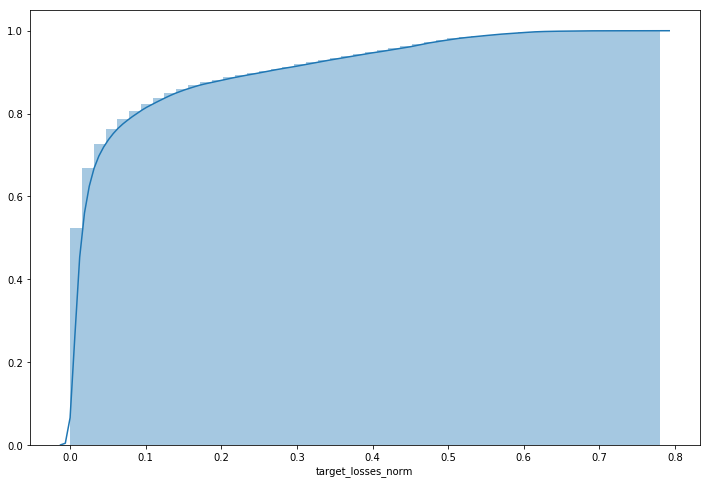

In [299]:
plt.figure(figsize=(12,8))
#plt.hist(loaded1.target_losses_norm, cumulative=True, density=True, bins=30)
#plt.show()

#kwargs = {'cumulative': True}
sns.distplot(loaded1.target_losses_norm, hist_kws={'cumulative': True}, kde_kws={'cumulative': True})
#sns.kdeplot(loaded1.target_losses_norm, cumulative=True)
plt.show()

//anaconda3/envs/nf/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


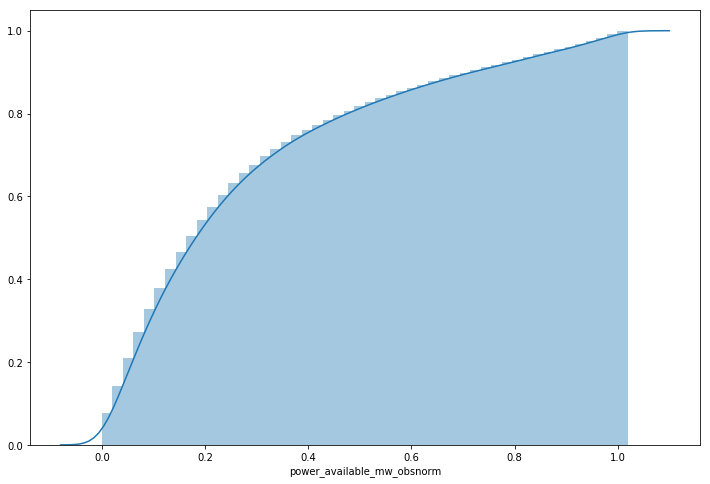

In [300]:
plt.figure(figsize=(12,8))
sns.distplot(loaded1.power_available_mw_obsnorm, hist_kws={'cumulative': True}, kde_kws={'cumulative': True})
#sns.kdeplot(loaded1.target_losses_norm, cumulative=True)
plt.show()

In [10]:
loaded1[loaded1.target_losses_norm < 0.01].count()

power_mw_obsnorm              29282
power_available_mw_obsnorm    29282
target_losses_norm            29282
dtype: int64

In [11]:
loaded1[loaded1.power_available_mw_obsnorm > 1].count()

power_mw_obsnorm              577
power_available_mw_obsnorm    577
target_losses_norm            577
dtype: int64

In [12]:
#loaded1.target_losses_norm.sort_values(ascending=False)
loaded1.power_available_mw_obsnorm.sort_values(ascending=False)

2019-03-04 20:30:00+01:00    1.019565
2019-03-04 19:20:00+01:00    1.019553
2019-03-04 19:30:00+01:00    1.019514
2019-03-04 18:50:00+01:00    1.019492
2019-03-04 20:40:00+01:00    1.019488
2019-03-04 19:40:00+01:00    1.019484
2019-03-04 19:10:00+01:00    1.019463
2019-03-04 18:40:00+01:00    1.019458
2019-03-04 18:30:00+01:00    1.019428
2019-03-04 18:20:00+01:00    1.019331
2019-03-04 21:10:00+01:00    1.019325
2019-03-04 19:00:00+01:00    1.019316
2019-03-04 17:50:00+01:00    1.019315
2019-03-04 20:10:00+01:00    1.019256
2019-03-04 17:40:00+01:00    1.019232
2019-03-04 18:10:00+01:00    1.019153
2019-03-04 16:50:00+01:00    1.019071
2019-03-04 19:50:00+01:00    1.019036
2019-03-04 16:20:00+01:00    1.019006
2019-03-04 21:30:00+01:00    1.018985
2019-03-04 21:00:00+01:00    1.018905
2019-03-04 21:20:00+01:00    1.018903
2019-03-04 20:20:00+01:00    1.018826
2019-03-04 16:40:00+01:00    1.018813
2019-03-15 16:20:00+01:00    1.018734
2019-03-04 17:20:00+01:00    1.018722
2019-03-04 1

In [13]:
print(loaded1.index[0])
print(loaded1.index[-1])

2018-01-01 00:00:00+01:00
2019-06-25 01:50:00+02:00


In [14]:
loaded1_2 = loaded1.copy()
loaded1_2.index = loaded1_2.index.tz_convert('UTC')
print(loaded1_2.index[0])
print(loaded1_2.index[-1])

2017-12-31 23:00:00+00:00
2019-06-24 23:50:00+00:00


In [15]:
print(loaded2.index[0])
print(loaded2.index[-1])

2018-01-01 06:00:00+00:00
2019-08-26 18:00:00+00:00


In [16]:
loaded2.index

DatetimeIndex(['2018-01-01 06:00:00+00:00', '2018-01-01 07:00:00+00:00',
               '2018-01-01 08:00:00+00:00', '2018-01-01 09:00:00+00:00',
               '2018-01-01 10:00:00+00:00', '2018-01-01 11:00:00+00:00',
               '2018-01-01 12:00:00+00:00', '2018-01-01 13:00:00+00:00',
               '2018-01-01 14:00:00+00:00', '2018-01-01 15:00:00+00:00',
               ...
               '2019-08-26 09:00:00+00:00', '2019-08-26 10:00:00+00:00',
               '2019-08-26 11:00:00+00:00', '2019-08-26 12:00:00+00:00',
               '2019-08-26 13:00:00+00:00', '2019-08-26 14:00:00+00:00',
               '2019-08-26 15:00:00+00:00', '2019-08-26 16:00:00+00:00',
               '2019-08-26 17:00:00+00:00', '2019-08-26 18:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='index', length=14378, freq=None)

In [17]:
index_test2 = pd.date_range(loaded2.index[0], loaded2.index[-1], freq='H')
print(len(index_test2))
index_test2

14461


DatetimeIndex(['2018-01-01 06:00:00+00:00', '2018-01-01 07:00:00+00:00',
               '2018-01-01 08:00:00+00:00', '2018-01-01 09:00:00+00:00',
               '2018-01-01 10:00:00+00:00', '2018-01-01 11:00:00+00:00',
               '2018-01-01 12:00:00+00:00', '2018-01-01 13:00:00+00:00',
               '2018-01-01 14:00:00+00:00', '2018-01-01 15:00:00+00:00',
               ...
               '2019-08-26 09:00:00+00:00', '2019-08-26 10:00:00+00:00',
               '2019-08-26 11:00:00+00:00', '2019-08-26 12:00:00+00:00',
               '2019-08-26 13:00:00+00:00', '2019-08-26 14:00:00+00:00',
               '2019-08-26 15:00:00+00:00', '2019-08-26 16:00:00+00:00',
               '2019-08-26 17:00:00+00:00', '2019-08-26 18:00:00+00:00'],
              dtype='datetime64[ns, UTC]', length=14461, freq='H')

In [18]:
loaded2.index.difference(index_test2)

DatetimeIndex([], dtype='datetime64[ns, UTC]', freq=None)

In [19]:
missing_dates = index_test2[~index_test2.isin(loaded2.index)]
print(len(missing_dates))
missing_dates

83


DatetimeIndex(['2019-04-30 19:00:00+00:00', '2019-04-30 20:00:00+00:00',
               '2019-04-30 21:00:00+00:00', '2019-04-30 22:00:00+00:00',
               '2019-04-30 23:00:00+00:00', '2019-05-01 00:00:00+00:00',
               '2019-05-01 01:00:00+00:00', '2019-05-01 02:00:00+00:00',
               '2019-05-01 03:00:00+00:00', '2019-05-01 04:00:00+00:00',
               '2019-05-01 05:00:00+00:00', '2019-05-01 06:00:00+00:00',
               '2019-05-01 07:00:00+00:00', '2019-05-01 08:00:00+00:00',
               '2019-05-01 09:00:00+00:00', '2019-05-01 10:00:00+00:00',
               '2019-05-01 11:00:00+00:00', '2019-05-01 12:00:00+00:00',
               '2019-05-01 13:00:00+00:00', '2019-05-01 14:00:00+00:00',
               '2019-05-01 15:00:00+00:00', '2019-05-01 16:00:00+00:00',
               '2019-05-01 17:00:00+00:00', '2019-05-01 18:00:00+00:00',
               '2019-05-01 19:00:00+00:00', '2019-05-01 20:00:00+00:00',
               '2019-05-01 21:00:00+00:00', '2019-0

In [20]:
start = loaded2.index[0]
print(start)
end = loaded1_2.index[-1]
print(end)

2018-01-01 06:00:00+00:00
2019-06-24 23:50:00+00:00


In [21]:
index_1 = pd.date_range(start, end, freq='10T')
print(len(index_1))
index_1

77724


DatetimeIndex(['2018-01-01 06:00:00+00:00', '2018-01-01 06:10:00+00:00',
               '2018-01-01 06:20:00+00:00', '2018-01-01 06:30:00+00:00',
               '2018-01-01 06:40:00+00:00', '2018-01-01 06:50:00+00:00',
               '2018-01-01 07:00:00+00:00', '2018-01-01 07:10:00+00:00',
               '2018-01-01 07:20:00+00:00', '2018-01-01 07:30:00+00:00',
               ...
               '2019-06-24 22:20:00+00:00', '2019-06-24 22:30:00+00:00',
               '2019-06-24 22:40:00+00:00', '2019-06-24 22:50:00+00:00',
               '2019-06-24 23:00:00+00:00', '2019-06-24 23:10:00+00:00',
               '2019-06-24 23:20:00+00:00', '2019-06-24 23:30:00+00:00',
               '2019-06-24 23:40:00+00:00', '2019-06-24 23:50:00+00:00'],
              dtype='datetime64[ns, UTC]', length=77724, freq='10T')

In [22]:
loaded2_2 = loaded2.copy()
print(len(loaded2_2))
loaded2_2 = loaded2_2.reindex(index_1)
print(len(loaded2_2))
print(loaded2_2.t_2m_k.notnull().sum())
print(loaded2_2.t_2m_k.isnull().sum())
#loaded2_2_copy = loaded2_2.copy()
#loaded2_2 = loaded2_2_copy.copy()

14378
77724
12871
64853


In [23]:
loaded2_2.fillna(method='ffill', limit=3, inplace=True)
loaded2_2.fillna(method='bfill', limit=2, inplace=True)
print(len(loaded2_2))
print(loaded2_2.t_2m_k.notnull().sum())
print(loaded2_2.t_2m_k.isnull().sum())

77724
77224
500


In [24]:
loaded2_2.t_2m_k[-5:]

2019-06-24 23:10:00+00:00    291.515942
2019-06-24 23:20:00+00:00    291.515942
2019-06-24 23:30:00+00:00    291.515942
2019-06-24 23:40:00+00:00           NaN
2019-06-24 23:50:00+00:00           NaN
Freq: 10T, Name: t_2m_k, dtype: float64

In [25]:
# 83*6 = 498, + 2 (at the end of the dataset, no bfill possible) --> 500 missing values
83*6 + 2

500

In [26]:
loaded_join = loaded2_2.join(loaded1_2)

In [27]:
loaded_join.isnull().sum().sort_values(ascending=False)

target_losses_norm            7056
power_mw_obsnorm              7056
power_available_mw_obsnorm    7056
t_pfg30_k                      500
gust_sfc_ms                    500
hpbl_sfc_m                     500
msl_ms_pa                      500
pottemp_80mto0m_K              500
q_2m_1                         500
q_pfg30_1                      500
r_pl925_%                      500
r_pl950_%                      500
shtfl_sfc_wm2                  500
t_100m_k                       500
t_2m_k                         500
tccmedium_sfc_%                500
tcclow_sfc_%                   500
wdir_100m_dn                   500
wdir_10m_dn                    500
wdir_pfg30_dn                  500
wdir_pl925_dn                  500
wsp_100m_ms                    500
wsp_10m_ms                     500
wsp_pfg30_ms                   500
wsp_pl925_ms                   500
created_on                     500
azimuth                        500
elevation                      500
dswrf_sfc_wm2       

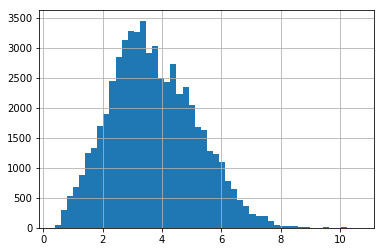

In [28]:
loaded_join[loaded_join.target_losses_norm < 0.1].wsp_10m_ms.hist(bins=50)
plt.show()

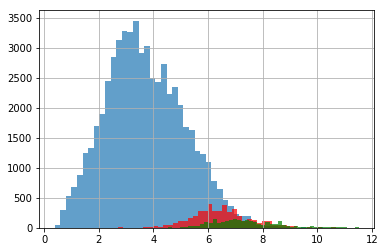

In [29]:
t = loaded_join.target_losses_norm
loaded_join[t < 0.1].wsp_10m_ms.hist(bins=50, alpha=0.7)
loaded_join[(t > 0.1) & (t < 0.2)].wsp_10m_ms.hist(bins=50, color='r', alpha=0.7)
loaded_join[(t > 0.2) & (t < 0.3)].wsp_10m_ms.hist(bins=50, color='g', alpha=0.7)
plt.show()

//anaconda3/envs/nf/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


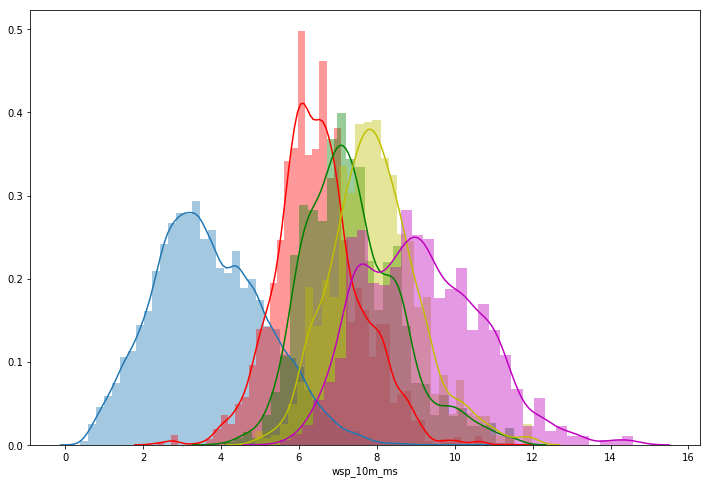

In [30]:
#t = loaded_join.target_losses_norm
plt.figure(figsize=(12,8))
sns.distplot(loaded_join[t < 0.1].wsp_10m_ms.dropna())
sns.distplot(loaded_join[(t > 0.1) & (t < 0.2)].wsp_10m_ms.dropna(), color='r')
sns.distplot(loaded_join[(t > 0.2) & (t < 0.3)].wsp_10m_ms.dropna(), color='g')
sns.distplot(loaded_join[(t > 0.3) & (t < 0.4)].wsp_10m_ms.dropna(), color='y')
sns.distplot(loaded_join[t > 0.4].wsp_10m_ms.dropna(), color='m')
plt.show()

//anaconda3/envs/nf/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


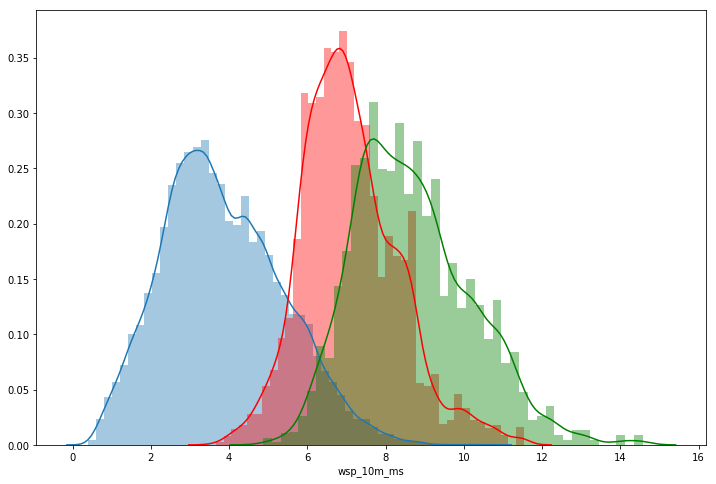

In [31]:
#t = loaded_join.target_losses_norm
plt.figure(figsize=(12,8))
sns.distplot(loaded_join[t < 0.15].wsp_10m_ms.dropna())
sns.distplot(loaded_join[(t > 0.15) & (t < 0.3)].wsp_10m_ms.dropna(), color='r')
sns.distplot(loaded_join[t > 0.3].wsp_10m_ms.dropna(), color='g')
plt.show()

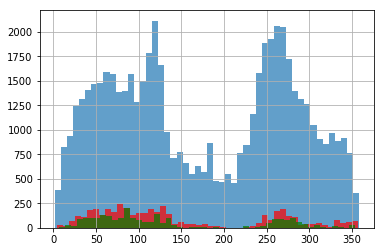

In [32]:
t = loaded_join.target_losses_norm
loaded_join[t < 0.1].wdir_10m_dn.hist(bins=50, alpha=0.7)
loaded_join[(t > 0.1) & (t < 0.2)].wdir_10m_dn.hist(bins=50, color='r', alpha=0.7)
loaded_join[(t > 0.2) & (t < 0.3)].wdir_10m_dn.hist(bins=50, color='g', alpha=0.7)
plt.show()

//anaconda3/envs/nf/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


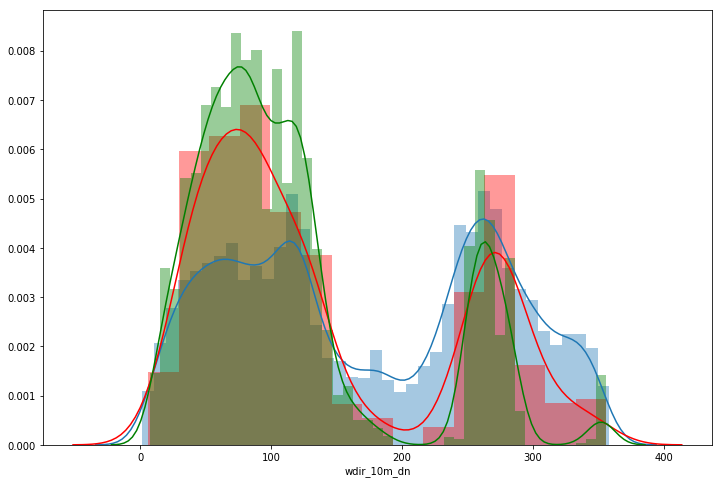

In [33]:
#t = loaded_join.target_losses_norm
plt.figure(figsize=(12,8))
sns.distplot(loaded_join[t < 0.15].wdir_10m_dn.dropna())
sns.distplot(loaded_join[(t > 0.15) & (t < 0.3)].wdir_10m_dn.dropna(), color='r')
sns.distplot(loaded_join[t > 0.3].wdir_10m_dn.dropna(), color='g')
plt.show()

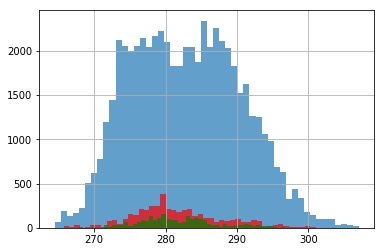

In [34]:
t = loaded_join.target_losses_norm
loaded_join[t < 0.1].t_2m_k.hist(bins=50, alpha=0.7)
loaded_join[(t > 0.1) & (t < 0.2)].t_2m_k.hist(bins=50, color='r', alpha=0.7)
loaded_join[(t > 0.2) & (t < 0.3)].t_2m_k.hist(bins=50, color='g', alpha=0.7)
plt.show()

//anaconda3/envs/nf/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


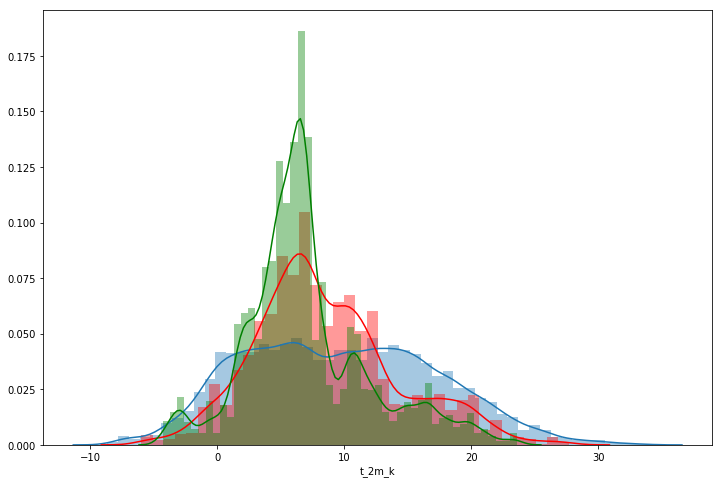

In [35]:
#t = loaded_join.target_losses_norm
plt.figure(figsize=(12,8))
sns.distplot(loaded_join[t < 0.15].t_2m_k.sub(273.15).dropna())
sns.distplot(loaded_join[(t > 0.15) & (t < 0.3)].t_2m_k.sub(273.15).dropna(), color='r')
sns.distplot(loaded_join[t > 0.3].t_2m_k.sub(273.15).dropna(), color='g')
plt.show()

In [36]:
from windrose import WindroseAxes
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np

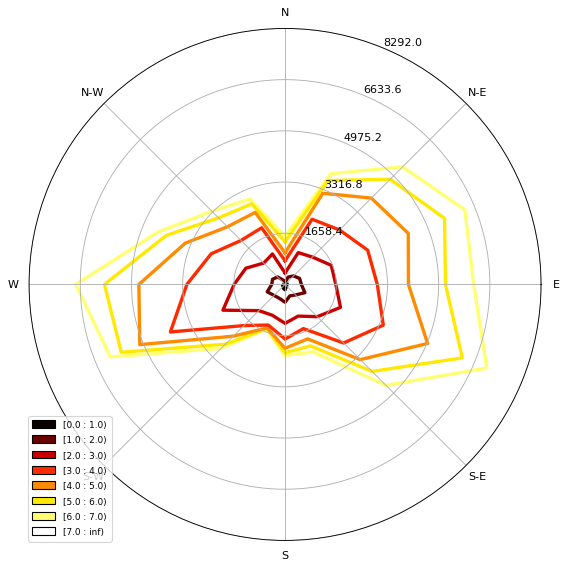

In [37]:
ax = WindroseAxes.from_ax()
ax.contour(loaded_join.wdir_10m_dn, loaded_join.wsp_10m_ms, bins=np.arange(0, 8, 1), cmap=cm.hot, lw=3)
ax.set_legend()

In [38]:
bins_range = np.arange(0,15,3)
bins_range

array([ 0,  3,  6,  9, 12])

<Figure size 864x576 with 0 Axes>

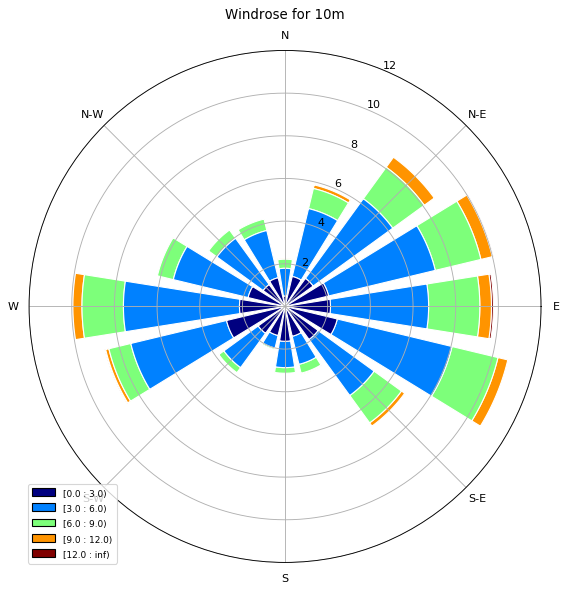

In [40]:
plt.figure(figsize=(12,8))
ax = WindroseAxes.from_ax()
ax.bar(loaded_join.wdir_10m_dn,
       loaded_join.wsp_10m_ms,
       normed=True,
       opening=0.8,
       edgecolor='white',
       bins=bins_range) #,
       #color='coolwarm')
ax.set_yticks(np.arange(2, 14, step=2))
ax.set_yticklabels(np.arange(2, 14, step=2))
ax.set_legend()
#plt.legend(loc='lower left')
#plt.tight_layout()
plt.title('Windrose for 10m')
plt.show()

In [41]:
360/22.5

16.0

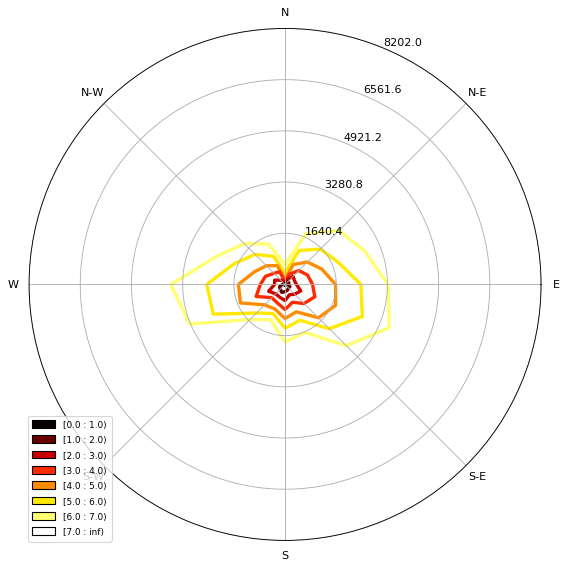

In [42]:
ax = WindroseAxes.from_ax()
ax.contour(loaded_join.wdir_100m_dn, loaded_join.wsp_100m_ms, bins=np.arange(0, 8, 1), cmap=cm.hot, lw=3)
ax.set_legend()

In [43]:
loaded_join[loaded_join.target_losses_norm > 0.5].wsp_10m_ms.count()

1566

In [44]:
loaded_join.rename(columns={'r_pl925_%': 'r_pl925_perc',
                            'r_pl950_%': 'r_pl950_perc',
                            'tcclow_sfc_%': 'tcclow_sfc_perc',
                            'tccmedium_sfc_%': 'tccmedium_sfc_perc'}, inplace=True)
#loaded_join.info()

In [45]:
import statsmodels.api as sms
import statsmodels.formula.api as smf

cols = loaded_join.columns

r_squared_adj_list = []

for i in range(len(cols)):
    
    form1 = 'target_losses_norm ~ ' + str(cols[i])


    model1 = smf.ols(data=loaded_join, formula=form1)
    results1 = model1.fit()
    #results1.summary()
    #print(str(cols[i]) + ' R_squared_adj: + ' + str(results1.rsquared_adj))
    r_squared_adj_list.append((cols[i], results1.rsquared_adj))

In [46]:
from operator import itemgetter
sorted(r_squared_adj_list, key=itemgetter(1), reverse=True) 

[('target_losses_norm', 1.0),
 ('created_on', 0.9216469004888264),
 ('power_available_mw_obsnorm', 0.7794446351791603),
 ('wsp_10m_ms', 0.6112666927673487),
 ('wsp_100m_ms', 0.6062051395997752),
 ('wsp_pfg30_ms', 0.6054584282985553),
 ('wsp_pl925_ms', 0.5534620975981248),
 ('gust_sfc_ms', 0.5258621490738299),
 ('power_mw_obsnorm', 0.4166933518930276),
 ('hpbl_sfc_m', 0.2636635897740315),
 ('msl_ms_pa', 0.08952863511554432),
 ('tcclow_sfc_perc', 0.0822245592819062),
 ('r_pl925_perc', 0.05039466765014067),
 ('wdir_10m_dn', 0.03282780009490516),
 ('wdir_100m_dn', 0.030361223052251862),
 ('wdir_pfg30_dn', 0.02960482266247666),
 ('r_pl950_perc', 0.026841990085968437),
 ('q_pfg30_1', 0.025907052646562012),
 ('q_2m_1', 0.02441327252422054),
 ('t_pfg30_k', 0.01878442533065139),
 ('t_100m_k', 0.018024631238886535),
 ('shtfl_sfc_wm2', 0.0171495118902113),
 ('pottemp_80mto0m_K', 0.01637337007290607),
 ('tccmedium_sfc_perc', 0.015529712492334924),
 ('wdir_pl925_dn', 0.013864061262829797),
 ('t_2m_

In [47]:
#form2 = 'target_losses_norm ~ wsp_10m_ms + wsp_100m_ms + wsp_pfg30_ms + wsp_pl925_ms + gust_sfc_ms + hpbl_sfc_m'
form1_2 = 'target_losses_norm ~ wsp_10m_ms + wsp_100m_ms + + wsp_pfg30_ms + wsp_pl925_ms + gust_sfc_ms'

model1_2 = smf.ols(data=loaded_join, formula=form1_2)
results1_2 = model1_2.fit()
results1_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     target_losses_norm   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                 2.769e+04
Date:                Thu, 19 Dec 2019   Prob (F-statistic):               0.00
Time:                        11:22:52   Log-Likelihood:                 82598.
No. Observations:               70187   AIC:                        -1.652e+05
Df Residuals:                   70181   BIC:                        -1.651e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.1654      0.001   -226.041      0.000      -0.167      -0.164
wsp_10m_ms       0.0297      0.000     72.150      0.000       0.029       0.030
wsp_100m_ms      0.0496      0.002     24.380      0.000       0.046       0.054
wsp_pfg30_ms    -0.0219      0.002    -10.410      0.000      -0.026      -0.018
wsp_pl925_ms     0.0092      0.000     59.206      0.000       0.009       0.009
gust_sfc_ms     -0.0251      0.000    -79.507      0.000      -0.026      -0.025
==============================================================================
Omnibus:                    15155.894   Durbin-Watson:                   0.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43793.599
Skew:                           1.135   Prob(JB):                         0.00
Kurtosis:                       6.134   Cond. No.                         200.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
index_2 = pd.date_range(start, end, freq='H')
print(len(index_2))
index_2

loaded2_3 = loaded2.copy()
print(len(loaded2_3))
loaded2_3 = loaded2_3.reindex(index_2)
print(len(loaded2_3))
print(loaded2_3.t_2m_k.notnull().sum())
print(loaded2_3.t_2m_k.isnull().sum())
#loaded2_2_copy = loaded2_2.copy()
#loaded2_2 = loaded2_2_copy.copy()
loaded1_3 = loaded1_2.copy()
print(len(loaded1_3))
loaded1_3 = loaded1_3.reindex(index_2)
print(len(loaded1_3))

12954
14378
12954
12871
83
70710
12954


In [49]:
loaded1_3.head(10)

,power_mw_obsnorm,power_available_mw_obsnorm,target_losses_norm
2018-01-01 06:00:00+00:00,0.561235,0.933616,0.372381
2018-01-01 07:00:00+00:00,0.443089,0.989338,0.546249
2018-01-01 08:00:00+00:00,0.515410,0.990189,0.474779
2018-01-01 09:00:00+00:00,0.442998,0.959186,0.516188
2018-01-01 10:00:00+00:00,0.475638,0.971460,0.495822
2018-01-01 11:00:00+00:00,0.622968,0.931122,0.308154
2018-01-01 12:00:00+00:00,0.561785,0.910409,0.348623
2018-01-01 13:00:00+00:00,0.532669,0.844381,0.311711
2018-01-01 14:00:00+00:00,0.512807,0.759911,0.247104
2018-01-01 15:00:00+00:00,0.462990,0.702665,0.239675


In [50]:
#loaded1_2[40:60]

In [51]:
loaded_join2 = loaded2_3.join(loaded1_3)

In [52]:
loaded_join2.isnull().sum().sort_values(ascending=False)

target_losses_norm            1178
power_mw_obsnorm              1178
power_available_mw_obsnorm    1178
t_pfg30_k                       83
gust_sfc_ms                     83
hpbl_sfc_m                      83
msl_ms_pa                       83
pottemp_80mto0m_K               83
q_2m_1                          83
q_pfg30_1                       83
r_pl925_%                       83
r_pl950_%                       83
shtfl_sfc_wm2                   83
t_100m_k                        83
t_2m_k                          83
tccmedium_sfc_%                 83
tcclow_sfc_%                    83
wdir_100m_dn                    83
wdir_10m_dn                     83
wdir_pfg30_dn                   83
wdir_pl925_dn                   83
wsp_100m_ms                     83
wsp_10m_ms                      83
wsp_pfg30_ms                    83
wsp_pl925_ms                    83
created_on                      83
azimuth                         83
elevation                       83
dswrf_sfc_wm2       

In [53]:
loaded_join2.rename(columns={'r_pl925_%': 'r_pl925_perc',
                            'r_pl950_%': 'r_pl950_perc',
                            'tcclow_sfc_%': 'tcclow_sfc_perc',
                            'tccmedium_sfc_%': 'tccmedium_sfc_perc'}, inplace=True)
#loaded_join.info()

In [54]:
import statsmodels.api as sms
import statsmodels.formula.api as smf

cols = loaded_join2.columns

r_squared_adj_list2 = []

for i in range(len(cols)):
    
    form2 = 'target_losses_norm ~ ' + str(cols[i])


    model2 = smf.ols(data=loaded_join2, formula=form2)
    results2 = model2.fit()
    #results1.summary()
    #print(str(cols[i]) + ' R_squared_adj: + ' + str(results1.rsquared_adj))
    r_squared_adj_list2.append((cols[i], results2.rsquared_adj))

In [55]:
from operator import itemgetter
sorted(r_squared_adj_list2, key=itemgetter(1), reverse=True) 

[('target_losses_norm', 1.0),
 ('created_on', 0.9100608170340745),
 ('power_available_mw_obsnorm', 0.7795116344205311),
 ('wsp_10m_ms', 0.6115594468103926),
 ('wsp_100m_ms', 0.607297199407443),
 ('wsp_pfg30_ms', 0.6065765762736974),
 ('wsp_pl925_ms', 0.5539543035672936),
 ('gust_sfc_ms', 0.5269291691364801),
 ('power_mw_obsnorm', 0.41594411068501547),
 ('hpbl_sfc_m', 0.2640635346800426),
 ('msl_ms_pa', 0.0893479828465723),
 ('tcclow_sfc_perc', 0.08118280902210084),
 ('r_pl925_perc', 0.050176983402705044),
 ('wdir_10m_dn', 0.03287408416762494),
 ('wdir_100m_dn', 0.030283861195008477),
 ('wdir_pfg30_dn', 0.029521495107670326),
 ('r_pl950_perc', 0.026592730570297096),
 ('q_pfg30_1', 0.02605127770333948),
 ('q_2m_1', 0.024571307418568056),
 ('t_pfg30_k', 0.01874105955774663),
 ('t_100m_k', 0.017974027605875076),
 ('shtfl_sfc_wm2', 0.017331431202486258),
 ('pottemp_80mto0m_K', 0.016164610810354474),
 ('tccmedium_sfc_perc', 0.01518450030824059),
 ('wdir_pl925_dn', 0.013592858943638708),
 ('t

In [56]:
form2_2 = 'target_losses_norm ~ wsp_10m_ms + wsp_100m_ms + wsp_pfg30_ms + wsp_pl925_ms + gust_sfc_ms'

model2_2 = smf.ols(data=loaded_join2, formula=form2_2)
results2_2 = model2_2.fit()
results2_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     target_losses_norm   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     4618.
Date:                Thu, 19 Dec 2019   Prob (F-statistic):               0.00
Time:                        11:23:12   Log-Likelihood:                 13741.
No. Observations:               11696   AIC:                        -2.747e+04
Df Residuals:                   11690   BIC:                        -2.743e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.1658      0.002    -92.276      0.000      -0.169      -0.162
wsp_10m_ms       0.0294      0.001     29.132      0.000       0.027       0.031
wsp_100m_ms      0.0492      0.005      9.852      0.000       0.039       0.059
wsp_pfg30_ms    -0.0212      0.005     -4.100      0.000      -0.031      -0.011
wsp_pl925_ms     0.0091      0.000     23.923      0.000       0.008       0.010
gust_sfc_ms     -0.0251      0.001    -32.353      0.000      -0.027      -0.024
==============================================================================
Omnibus:                     2574.864   Durbin-Watson:                   0.206
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7554.047
Skew:                           1.147   Prob(JB):                         0.00
Kurtosis:                       6.200   Cond. No.                         200.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
#import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True'
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import XGBRegressor
#from imblearn.under_sampling import RandomUnderSampler
#from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn import decomposition
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
#import time

In [58]:
#loaded_join.isnull().sum()

In [59]:
loaded_join_notnull = loaded_join.dropna()

In [60]:
#loaded_join_notnull.isnull().sum()
len(loaded_join_notnull)

70187

In [321]:
# XGBoost without undersampling, scaling and imputation
# XGBoost is able to perform with NaNs!


y = loaded_join_notnull.target_losses_norm
X = loaded_join_notnull.drop(columns=['target_losses_norm', 'power_available_mw_obsnorm', 'power_mw_obsnorm', 'created_on', 'wsp_pfg30_ms', 'wsp_100m_ms'])
#X = loaded_join_notnull[['wsp_10m_ms', 'wsp_100m_ms', 'wsp_pfg30_ms', 'wsp_pl925_ms', 'gust_sfc_ms']]

#X = loaded_join_notnull[['wsp_10m_ms', 't_2m_k']].values # wsp_10m_ms
#X = loaded_join_notnull[['azimuth']].values
#X.reshape(-1,1)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [62]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
preds0 = lr.predict(X_test)

In [63]:
rmse = np.sqrt(mean_squared_error(y_test, preds0))
print("RMSE: %f" % (rmse))
print(explained_variance_score(preds0, y_test))

RMSE: 0.079593
0.3931358607416906


In [64]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Mean absolute error (MAE)
mae0 = mean_absolute_error(y_test.values.ravel(), preds0)

# Mean squared error (MSE)
mse0 = mean_squared_error(y_test.values.ravel(), preds0)

# R-squared scores
r20 = r2_score(y_test.values.ravel(), preds0)

# Print metrics
print('Mean Absolute Error:', round(mae0, 2))
print('Mean Squared Error:', round(mse0, 2))
print('R-squared scores:', round(r20, 2))

Mean Absolute Error: 0.06
Mean Squared Error: 0.01
R-squared scores: 0.62


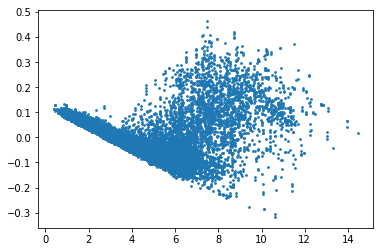

In [66]:
plt.scatter(X_test[:,0], y_test - preds0, s=3)
plt.show()

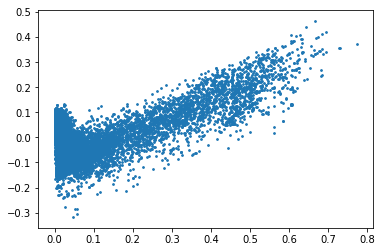

In [67]:
plt.scatter(y_test, y_test - preds0, s=3)
plt.show()

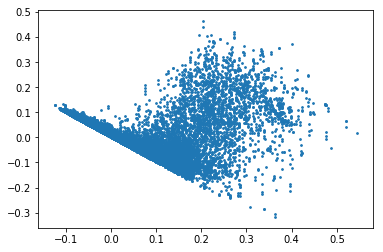

In [68]:
plt.scatter(preds0, y_test - preds0, s=3)
plt.show()

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
lr = LinearRegression()
lr.fit(X_train, y_train)
preds0 = lr.predict(X_test)

In [70]:
poly_reg = PolynomialFeatures(degree = 7)
X_train_poly = poly_reg.fit_transform(X_train)

# polynomial regression model
pr = LinearRegression()
pr.fit(X_train_poly, y_train)
preds0_2 = pr.predict(poly_reg.fit_transform(X_test))

In [71]:
rmse2 = np.sqrt(mean_squared_error(y_test, preds0_2))
print("RMSE: %f" % (rmse2))
print(explained_variance_score(preds0_2, y_test))

RMSE: 0.060445
0.7264697308572203


In [72]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Mean absolute error (MAE)
mae0_2 = mean_absolute_error(y_test.values.ravel(), preds0_2)

# Mean squared error (MSE)
mse0_2 = mean_squared_error(y_test.values.ravel(), preds0_2)

# R-squared scores
r20_2 = r2_score(y_test.values.ravel(), preds0_2)

# Print metrics
print('Mean Absolute Error:', round(mae0_2, 5))
print('Mean Squared Error:', round(mse0_2, 5))
print('R-squared scores:', round(r20_2, 5))

Mean Absolute Error: 0.0314
Mean Squared Error: 0.00365
R-squared scores: 0.78329


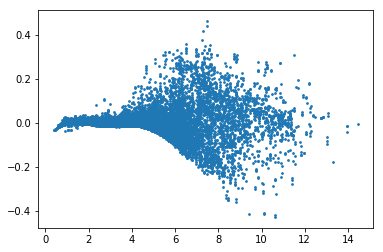

In [73]:
plt.scatter(X_test[:,0], y_test - preds0_2, s=3)
plt.show()

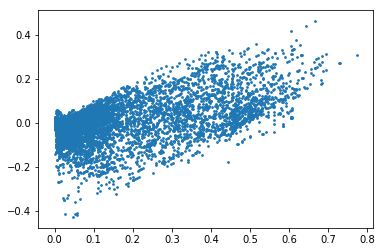

In [74]:
plt.scatter(y_test, y_test - preds0_2, s=3)
plt.show()

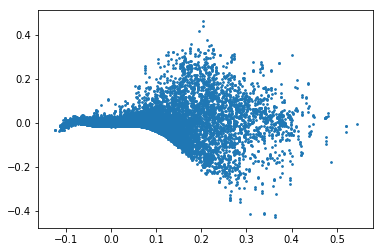

In [75]:
plt.scatter(preds0, y_test - preds0_2, s=3)
plt.show()

In [76]:
XGB = XGBRegressor()
XGB.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1)

In [77]:
preds = XGB.predict(X_test)

In [78]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.055854


In [79]:
print(explained_variance_score(preds, y_test))

0.7705495131236519


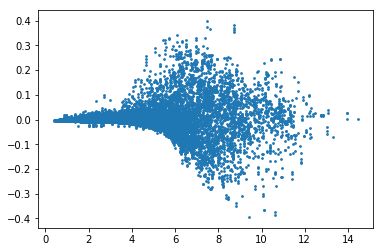

In [81]:
plt.scatter(X_test[:,0], y_test - preds, s=3)
plt.show()

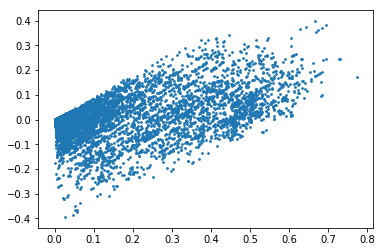

In [82]:
plt.scatter(y_test, y_test - preds, s=3)
plt.show()

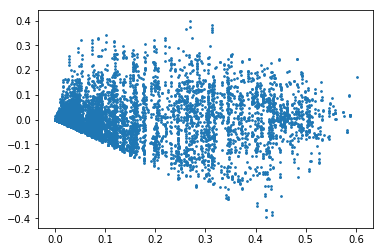

In [83]:
plt.scatter(preds, y_test - preds, s=3)
plt.show()

In [84]:
# Use the forest's predict method on the test data
errors = abs(preds - y_test) # Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.03


In [85]:
# Calculate mean absolute percentage error (MAPE)

mape = 100 * (errors / y_test)# Calculate and display accuracy
print(mape[:20])
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

2018-02-18 12:20:00+00:00    322.258586
2018-01-12 10:20:00+00:00     49.287478
2018-09-20 17:00:00+00:00     68.352926
2018-03-14 23:10:00+00:00    209.434173
2018-10-25 00:50:00+00:00     26.346423
2018-02-01 13:50:00+00:00     66.885732
2018-01-08 15:40:00+00:00     46.046643
2018-03-22 05:30:00+00:00     31.330442
2018-01-25 15:40:00+00:00     65.919826
2018-05-08 17:40:00+00:00     61.719972
2018-01-06 00:00:00+00:00    364.749265
2018-08-07 09:10:00+00:00     18.276185
2019-03-15 18:40:00+00:00     10.305266
2018-01-08 04:10:00+00:00     71.495338
2018-11-25 12:50:00+00:00    397.960132
2019-04-03 22:40:00+00:00     87.445798
2018-12-23 17:50:00+00:00    162.192953
2018-08-09 16:50:00+00:00    234.261994
2018-08-13 23:20:00+00:00     52.526571
2018-02-14 01:50:00+00:00     60.974467
Name: target_losses_norm, dtype: float64
Accuracy: -28.83 %.


In [322]:
rfr = RandomForestRegressor(n_jobs=-1, random_state=0, n_estimators=10)
rfr.fit(X_train, y_train)
preds2 = rfr.predict(X_test)

rmse2 = (mean_squared_error(preds2, y_test))**0.5
rmse2

0.016220270696755322

In [323]:
print(explained_variance_score(preds2, y_test))

0.9842470010366211


In [324]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Mean absolute error (MAE)
mae = mean_absolute_error(y_test.values.ravel(), preds2)

# Mean squared error (MSE)
mse = mean_squared_error(y_test.values.ravel(), preds2)

# R-squared scores
r2 = r2_score(y_test.values.ravel(), preds2)

# Print metrics
print('Mean Absolute Error:', round(mae, 5))
print('Mean Squared Error:', round(mse, 5))
print('R-squared scores:', round(r2, 5))

Mean Absolute Error: 0.00696
Mean Squared Error: 0.00026
R-squared scores: 0.98439


In [305]:
rfr.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)>

In [90]:
preds2[-10:]

array([0.00233995, 0.01312965, 0.01735473, 0.00324034, 0.35391752,
       0.21115436, 0.00556396, 0.00201567, 0.02183067, 0.00340975])

In [91]:
y_test[-10:].values

array([0.00223941, 0.00597965, 0.00930195, 0.00218499, 0.36679359,
       0.21030733, 0.00401332, 0.0026068 , 0.01214412, 0.00336425])

In [92]:
X_test.shape

(17547, 2)

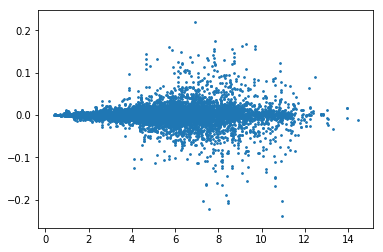

In [93]:
plt.scatter(X_test[:,0], y_test - preds2, s=3)
plt.show()

In [94]:
y_test.shape

(17547,)

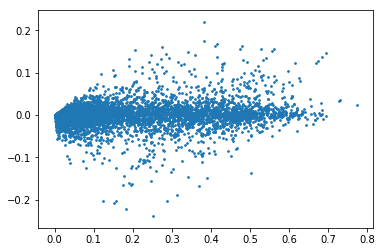

In [95]:
plt.scatter(y_test, (y_test - preds2), s=3)
plt.show()

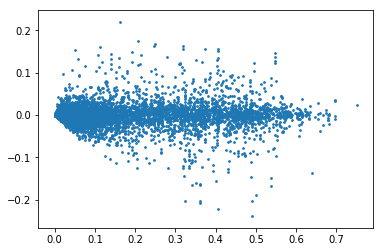

In [96]:
plt.scatter(preds2, (y_test - preds2), s=3)
plt.show()

In [310]:
sorted(rfr.feature_importances_, reverse=True)

[0.4686276297474298,
 0.3372833700995165,
 0.026804490030446437,
 0.02587791657163811,
 0.013443077914614729,
 0.012052099014268729,
 0.008142881977772727,
 0.008018545420516054,
 0.007574692819859237,
 0.00752126629471533,
 0.0073825100334595955,
 0.007323144661315997,
 0.006542095859793725,
 0.006406093252988039,
 0.0063560054507097495,
 0.006189868517651832,
 0.005935844089753488,
 0.00584955285600169,
 0.005485216932935995,
 0.00526321486577012,
 0.004833469341986275,
 0.004792013617539295,
 0.0045670441928095445,
 0.004027195873291272,
 0.0037007605632157327]

In [325]:
X.columns

Index(['dswrf_sfc_wm2', 'gust_sfc_ms', 'hpbl_sfc_m', 'msl_ms_pa',
       'pottemp_80mto0m_K', 'q_2m_1', 'q_pfg30_1', 'r_pl925_perc',
       'r_pl950_perc', 'shtfl_sfc_wm2', 't_100m_k', 't_2m_k', 't_pfg30_k',
       'tcclow_sfc_perc', 'tccmedium_sfc_perc', 'wdir_100m_dn', 'wdir_10m_dn',
       'wdir_pfg30_dn', 'wdir_pl925_dn', 'wsp_10m_ms', 'wsp_pl925_ms',
       'azimuth', 'elevation'],
      dtype='object')

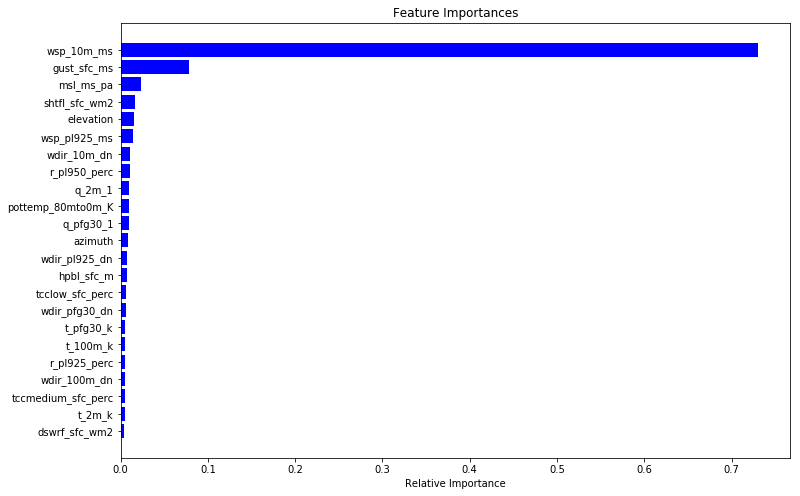

In [330]:

features = X.columns
importances = rfr.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [329]:
indices

array([ 0, 11, 14, 15,  7, 10, 12, 17, 13,  2, 18, 21,  6,  4,  5,  8, 16,
       20, 22,  9,  3,  1, 19])

In [98]:
print(rfr.get_params())

{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': -1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [99]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
#n_estimators = [2, 5, 10, 20, 40, 60, 80, 100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
n_estimators = [2, 10, 50, 100]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth = [5, 10, 20]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

#pprint(random_grid)
#{'bootstrap': [True, False],
# 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
# 'max_features': ['auto', 'sqrt'],
# 'min_samples_leaf': [1, 2, 4],
# 'min_samples_split': [2, 5, 10],
# 'n_estimators': [2, 5, 10, 20, 40, 60, 80, 100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
 #'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
#}

In [100]:
print(random_grid)

{'n_estimators': [2, 10, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 20, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [101]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfr2 = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rfr2_random = RandomizedSearchCV(estimator = rfr2,
                                 param_distributions = random_grid,
                                 n_iter = 10,
                                 cv = 5,
                                 verbose=2,
                                 random_state=0,
                                 n_jobs = -1)
# Fit the random search model
rfr2_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   48.4s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...n

In [102]:
rfr2_random.best_params_

{'n_estimators': 2,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [103]:
rfr2_random.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=2, n_jobs=None,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [104]:
rfr3 = rfr2_random.best_estimator_
rfr3.fit(X_train, y_train)
preds2_r = rfr3.predict(X_test)

In [105]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Mean absolute error (MAE)
mae_r = mean_absolute_error(y_test.values.ravel(), preds2_r)

# Mean squared error (MSE)
mse_r = mean_squared_error(y_test.values.ravel(), preds2_r)

# R-squared scores
r2_r = r2_score(y_test.values.ravel(), preds2_r)

# Print metrics
print('Mean Absolute Error:', round(mae_r, 5))
print('Mean Squared Error:', round(mse_r, 5))
print('R-squared scores:', round(r2_r, 5))

Mean Absolute Error: 0.00674
Mean Squared Error: 0.00026
R-squared scores: 0.98465


In [106]:
random_grid

{'n_estimators': [2, 10, 50, 100],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 10, 20, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [445]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfr2 = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rfr2_grid = GridSearchCV(estimator = rfr2,
                                 param_grid = random_grid,
                                 cv = 5,
                                 n_jobs = -1)
# Fit the random search model
rfr2_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True, False],
     

In [446]:
rfr2_grid.best_params_

{'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

In [448]:
rfr2_grid_best = rfr2_grid.best_estimator_
rfr2_grid_best.fit(X_train, y_train)
preds_g = rfr2_grid_best.predict(X_test)

In [449]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
# Mean absolute error (MAE)
mae_g = mean_absolute_error(y_test.values.ravel(), preds_g)
# Mean squared error (MSE)
mse_g = mean_squared_error(y_test.values.ravel(), preds_g)
# R-squared scores
r2_g = r2_score(y_test.values.ravel(), preds_g)
# Explained Variance Score
evs_g = explained_variance_score(preds_g, y_test)
# Print metrics
print('Mean Absolute Error:', round(mae_g, 5))
print('Mean Squared Error:', round(mse_g, 5))
print('R-squared scores:', round(r2_g, 5))
print('Explained Variance Score:', round(evs_g, 5))

Mean Absolute Error: 0.00673
Mean Squared Error: 0.00026
R-squared scores: 0.98473
Explained Variance Score: 0.98468


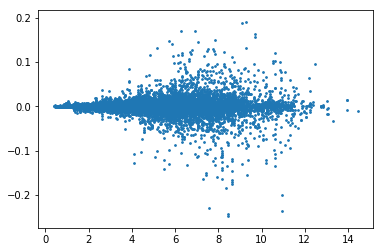

In [451]:
plt.scatter(X_test[:,0], y_test - preds_g, s=3)
plt.show()

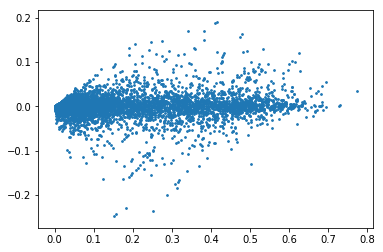

In [452]:
plt.scatter(y_test, y_test - preds_g, s=3)
plt.show()

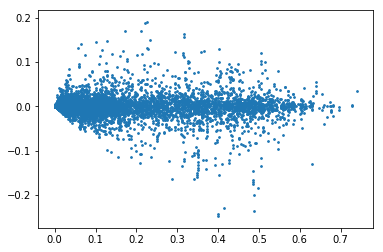

In [453]:
plt.scatter(preds_g, y_test - preds_g, s=3)
plt.show()

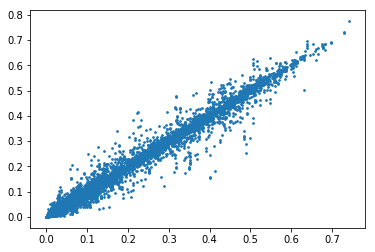

In [454]:
plt.scatter(preds_g, y_test, s=3)
plt.show()

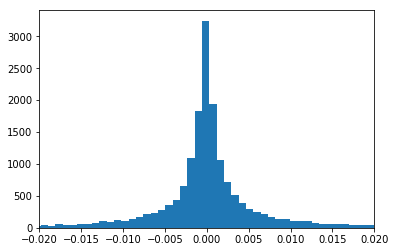

In [469]:
plt.hist((y_test - preds_g), bins=500)
#plt.xlim((-2,2))
plt.xlim((-0.02,0.02))
plt.show()

In [56]:
#features = X.columns
#importances = list(rfr.feature_importances_)
#features_importances = [(feature, round(importance, 2)) for feature, importance in zip(features, importances)]
#features_importances = sorted(features_importances, key = lambda x: x[1], reverse = True)
#[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in features_importances];

In [107]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=100, gamma='auto', epsilon=.1)
svr_rbf.fit(X_train, y_train)
preds3 = svr_rbf.predict(X_test)

In [108]:
rmse3 = (mean_squared_error(preds3, y_test))**0.5
rmse3

0.07448876631287589

In [109]:
print(explained_variance_score(preds3, y_test))

0.6240321963604356


In [115]:
# Mean absolute error (MAE)
mae2 = mean_absolute_error(y_test, preds3)

# Mean squared error (MSE)
mse2 = mean_squared_error(y_test, preds3)

# R-squared scores
r22 = r2_score(y_test, preds3)

# Print metrics
print('Mean Absolute Error:', round(mae2, 2))
print('Mean Squared Error:', round(mse2, 2))
print('R-squared scores:', round(r22, 2))

Mean Absolute Error: 0.06
Mean Squared Error: 0.01
R-squared scores: 0.67


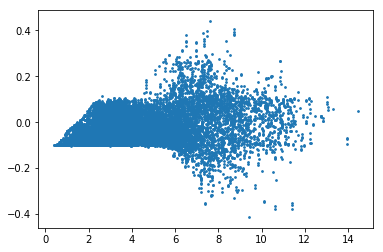

In [116]:
plt.scatter(X_test[:,0], y_test - preds3, s=3)
plt.show()

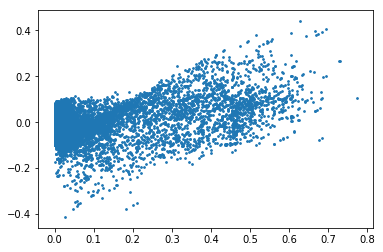

In [117]:
plt.scatter(y_test, y_test - preds3, s=3)
plt.show()

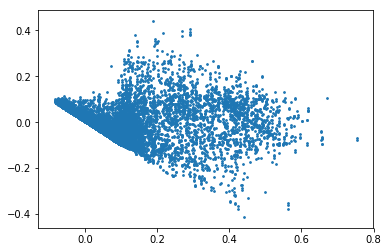

In [118]:
plt.scatter(preds3, y_test - preds3, s=3)
plt.show()

In [119]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=2)
knr.fit(X_train, y_train)
preds4 = knr.predict(X_test)

In [120]:
rmse4 = (mean_squared_error(preds4, y_test))**0.5
rmse4

0.0174350642968697

In [121]:
knr.score(X_test, y_test) # default: r2

0.981969251176703

In [122]:
print(explained_variance_score(preds4, y_test))

0.981931583837802


In [123]:
# Mean absolute error (MAE)
mae3 = mean_absolute_error(y_test.values.ravel(), preds4)

# Mean squared error (MSE)
mse3 = mean_squared_error(y_test.values.ravel(), preds4)

# R-squared scores
r23 = r2_score(y_test.values.ravel(), preds4)

# Print metrics
print('Mean Absolute Error:', round(mae3, 2))
print('Mean Squared Error:', round(mse3, 2))
print('R-squared scores:', round(r23, 2))

Mean Absolute Error: 0.01
Mean Squared Error: 0.0
R-squared scores: 0.98


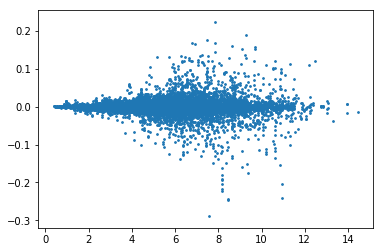

In [124]:
plt.scatter(X_test[:,0], y_test - preds4, s=3)
plt.show()

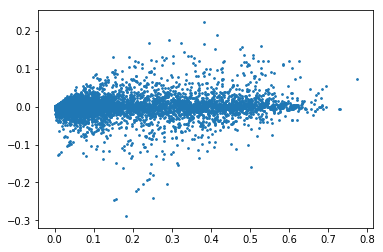

In [125]:
plt.scatter(y_test, y_test - preds4, s=3)
plt.show()

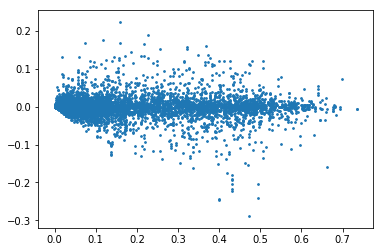

In [126]:
plt.scatter(preds4, y_test - preds4, s=3)
plt.show()

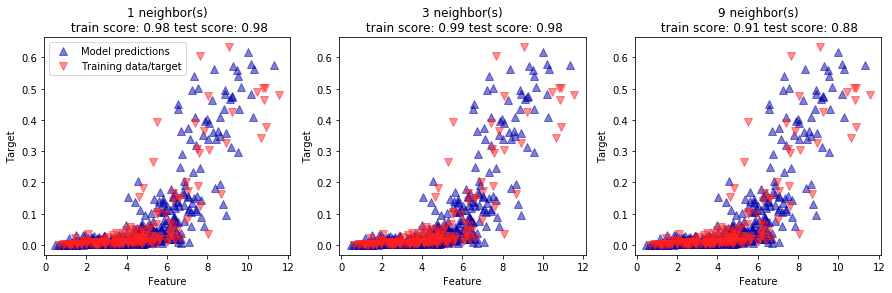

In [139]:
import mglearn
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3 
line = np.linspace(0, 12, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    #ax.scatter(X_test[:,0], reg.predict(X_test))
    ax.plot(X_train[::100,0], y_train[::100], '^', c=mglearn.cm2(0), markersize=8, alpha=0.5)
    ax.plot(X_test[::100,0], y_test[::100], 'v', c=mglearn.cm2(1), markersize=8, alpha=0.5)
    ax.set_title(
                "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
                n_neighbors, reg.score(X_train, y_train),
                reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    axes[0].legend(["Model predictions", "Training data/target",
                    "Test data/target"], loc="best")

In [140]:
from sklearn.neighbors import RadiusNeighborsRegressor
rnr = RadiusNeighborsRegressor()
rnr.fit(X_train, y_train)
preds5 = rnr.predict(X_test)

In [141]:
rmse5 = (mean_squared_error(preds5, y_test))**0.5
rmse5

0.05803622079962098

In [142]:
print(explained_variance_score(preds5, y_test))

0.7400778995429099


In [143]:
# Mean absolute error (MAE)
mae4 = mean_absolute_error(y_test.values.ravel(), preds5)

# Mean squared error (MSE)
mse4 = mean_squared_error(y_test.values.ravel(), preds5)

# R-squared scores
r24 = r2_score(y_test.values.ravel(), preds5)

# Print metrics
print('Mean Absolute Error:', round(mae4, 2))
print('Mean Squared Error:', round(mse4, 2))
print('R-squared scores:', round(r24, 2))

Mean Absolute Error: 0.03
Mean Squared Error: 0.0
R-squared scores: 0.8


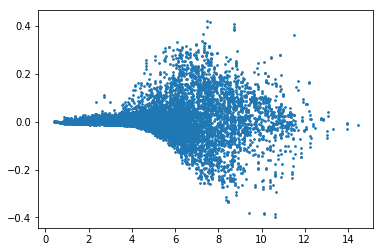

In [145]:
plt.scatter(X_test[:,0], y_test - preds5, s=3)
plt.show()

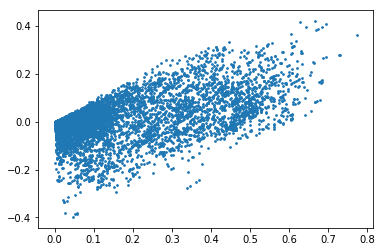

In [146]:
plt.scatter(y_test, y_test - preds5, s=3)
plt.show()

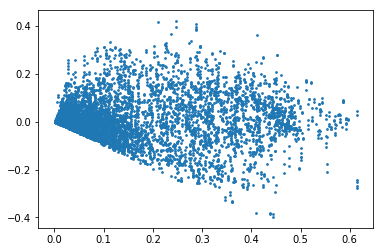

In [147]:
plt.scatter(preds5, y_test - preds5, s=3)
plt.show()

In [72]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
#gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
#gpr.fit(X_train, y_train)
#preds6 = gpr.predict(X_test)

In [73]:
rmse6 = (mean_squared_error(preds6, y_test))**0.5
rmse6

NameError: name 'preds6' is not defined

In [ ]:
print(explained_variance_score(preds6, y_test))

In [ ]:
# Mean absolute error (MAE)
mae5 = mean_absolute_error(y_test.values.ravel(), preds6)

# Mean squared error (MSE)
mse5 = mean_squared_error(y_test.values.ravel(), preds6)

# R-squared scores
r25 = r2_score(y_test.values.ravel(), preds6)

# Print metrics
print('Mean Absolute Error:', round(mae5, 2))
print('Mean Squared Error:', round(mse5, 2))
print('R-squared scores:', round(r25, 2))

In [148]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score, KFold
from keras.models import Sequential
from sklearn.metrics import accuracy_score
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
seed = 1

#diabetes = datasets.load_diabetes()
#X = diabetes.data[:150]
#y = diabetes.target[:150]

def regression_model():
    model = Sequential()
    model.add(Dense(10, input_dim=2, activation='relu'))
    #model.add(Dense(50, activation='relu'))
    #model.add(Dense(50, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae','accuracy'])
    return model


estimator = KerasRegressor(build_fn=regression_model, nb_epoch=100, batch_size=100, verbose=False)
estimator.fit(X_train, y_train)
prediction_nn = estimator.predict(X_test)

train_error =  np.abs(y_test - prediction_nn)
mean_error = np.mean(train_error)
min_error = np.min(train_error)
max_error = np.max(train_error)
std_error = np.std(train_error)

Using TensorFlow backend.
//anaconda3/envs/nf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
//anaconda3/envs/nf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
//anaconda3/envs/nf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
//anaconda3/envs/nf/lib/python3.6/site-packages/tensorflow/python

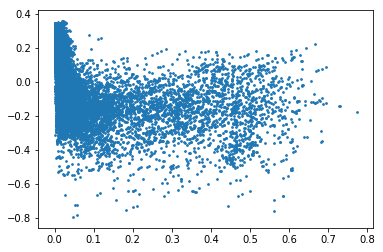

In [149]:
plt.scatter(y_test, y_test - prediction_nn, s=3)
plt.show()

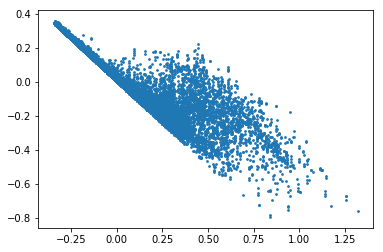

In [150]:
plt.scatter(prediction_nn, y_test - prediction_nn, s=3)
plt.show()

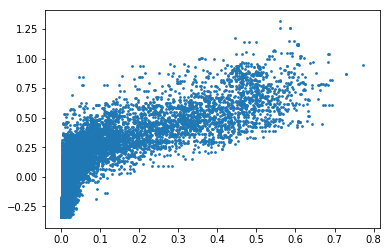

In [151]:
plt.scatter(y_test, prediction_nn, s=3)
plt.show()

In [296]:
# Start neural network
network = Sequential()

# Add fully connected layer with a ReLU activation function
network.add(Dense(units=1, activation='relu', input_shape=(X_train.shape[1],)))

# Add fully connected layer with a ReLU activation function
network.add(Dense(units=32, activation='relu'))

# Add fully connected layer with a ReLU activation function
network.add(Dense(units=32, activation='relu'))


# Add fully connected layer with no activation function
network.add(Dense(units=1, activation='linear'))

In [297]:
# Compile neural network
network.compile(loss='mse', # Mean squared error
                optimizer='RMSprop', # Optimization algorithm
                metrics=['mse']) # Mean squared error

In [298]:
# Train neural network
history = network.fit(X_train, # Features
                      y_train, # Target vector
                      epochs=100, # Number of epochs
                      verbose=0, # No output
                      batch_size=100, # Number of observations per batch
                      validation_data=(X_test, y_test)) # Data for evaluation

In [290]:
prediction_nn2 = network.predict(X_test)

In [291]:
prediction_nn2.reshape(-1).shape

(17547,)

In [292]:
y_test.shape

(17547,)

In [293]:
train_error2 =  np.abs(y_test - prediction_nn2.reshape(-1))
mean_error = np.mean(train_error2)
min_error = np.min(train_error2)
max_error = np.max(train_error2)
std_error = np.std(train_error2)

In [294]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
# Mean absolute error (MAE)
mae_nn2 = mean_absolute_error(y_test, prediction_nn2.reshape(-1))
# Mean squared error (MSE)
mse_nn2 = mean_squared_error(y_test, prediction_nn2.reshape(-1))
# R-squared scores
r2_nn2 = r2_score(y_test, prediction_nn2.reshape(-1))
# Explained Variance Score
evs_nn2 = explained_variance_score(prediction_nn2.reshape(-1), y_test)
# Print metrics
print('Mean Absolute Error:', round(mae_nn2, 5))
print('Mean Squared Error:', round(mse_nn2, 5))
print('R-squared scores:', round(r2_nn2, 5))
print('Explained Variance Score:', round(evs_nn2, 5))

Mean Absolute Error: 0.0321
Mean Squared Error: 0.00401
R-squared scores: 0.76203
Explained Variance Score: 0.68822


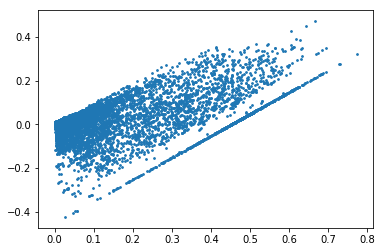

In [295]:
plt.scatter(y_test, y_test - prediction_nn2.reshape(-1), s=3)
plt.show()

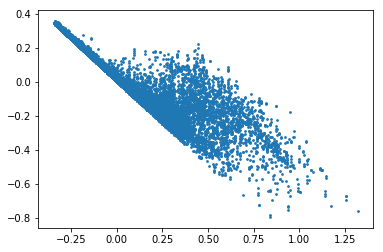

In [235]:
plt.scatter(prediction_nn.reshape(-1), y_test - prediction_nn.reshape(-1), s=3)
plt.show()

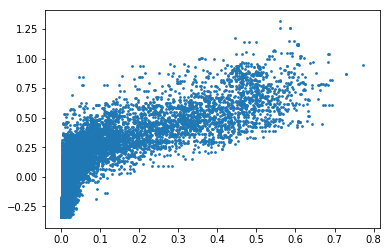

In [334]:
plt.scatter(y_test, prediction_nn.reshape(-1), s=3)
plt.show()

In [450]:
import importlib

##%load_ext autoreload
#%autoreload 1
#%aimport ipynb.fs.defs.Function_File_Test

importlib.reload(ipynb.fs.defs.Function_File_Test)
 
#from ipynb.fs.full.Project_Loss_Work_Daniel_Part_2_Statistical_Learning import reg_evaluation
#import ipynb.fs.full.Project_Loss_Work_Daniel_Part_2_Statistical_Learning
#from ipynb.fs.defs.Function_File_Test import reg_evaluation
import ipynb.fs.defs.Function_File_Test as fft
#from ipynb.fs.defs.Function_File_Test import reg_evaluation
#from ipynb.fs.defs.Function_File_Test import reg_evaluation, hello_world

In [448]:
fft.reg_evaluation(y_test, prediction_nn2)

R-squared Score: 0.76203
Explained Variance Score 0.769674
Root Mean Squared Error: 0.06334
Mean Squared Error: 0.004012
Mean Absolute Error: 0.032103


In [451]:
fft.hello_world()

hello world hello world
